In [156]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.spatial import distance

In [157]:
penguins = pd.read_csv("penguins.csv")
print(penguins)
penguins.dropna()

    studyName  SampleNumber                              Species  Region  \
0     PAL0708             1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1     PAL0708             2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2     PAL0708             3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3     PAL0708             4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4     PAL0708             5  Adelie Penguin (Pygoscelis adeliae)  Anvers   
..        ...           ...                                  ...     ...   
339   PAL0910           120    Gentoo penguin (Pygoscelis papua)  Anvers   
340   PAL0910           121    Gentoo penguin (Pygoscelis papua)  Anvers   
341   PAL0910           122    Gentoo penguin (Pygoscelis papua)  Anvers   
342   PAL0910           123    Gentoo penguin (Pygoscelis papua)  Anvers   
343   PAL0910           124    Gentoo penguin (Pygoscelis papua)  Anvers   

        Island               Stage IndividualID ClutchCompletion   DateEgg  \
0    Torg

,studyName,SampleNumber,Species,Region,Island,Stage,IndividualID,ClutchCompletion,DateEgg,CulmenLength_mm,CulmenDepth_mm,FlipperLength_mm,BodyMass_g,Sex,Delta15N,Delta13C,Comments
6,PAL0708,7,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A1,No,11/15/07,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799,Nest never observed with full clutch.
7,PAL0708,8,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A2,No,11/15/07,39.2,19.6,195.0,4675.0,MALE,9.46060,-24.89958,Nest never observed with full clutch.
28,PAL0708,29,Adelie Penguin (Pygoscelis adeliae),Anvers,Biscoe,"Adult, 1 Egg Stage",N18A1,No,11/10/07,37.9,18.6,172.0,3150.0,FEMALE,8.38404,-25.19837,Nest never observed with full clutch.
29,PAL0708,30,Adelie Penguin (Pygoscelis adeliae),Anvers,Biscoe,"Adult, 1 Egg Stage",N18A2,No,11/10/07,40.5,18.9,180.0,3950.0,MALE,8.90027,-25.11609,Nest never observed with full clutch.
38,PAL0708,39,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,"Adult, 1 Egg Stage",N25A1,No,11/13/07,37.6,19.3,181.0,3300.0,FEMALE,9.41131,-25.04169,Nest never observed with full clutch.
68,PAL0809,69,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N32A1,No,11/11/08,35.9,16.6,190.0,3050.0,FEMALE,8.47781,-26.07821,Nest never observed with full clutch.
69,PAL0809,70,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N32A2,No,11/11/08,41.8,19.4,198.0,4450.0,MALE,8.86853,-26.06209,Nest never observed with full clutch.
120,PAL0910,121,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N66A1,No,11/17/09,36.2,17.2,187.0,3150.0,FEMALE,9.04296,-26.19444,Nest never observed with full clutch.
121,PAL0910,122,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N66A2,No,11/17/09,37.7,19.8,198.0,3500.0,MALE,9.11066,-26.42563,Nest never observed with full clutch.
130,PAL0910,131,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N73A1,No,11/23/09,38.5,17.9,190.0,3325.0,FEMALE,8.98460,-25.57956,Nest never observed with full clutch.


In [158]:
penguins = make_blobs(n_samples= 139,
                      centers= 5,
                      n_features=2,
                      cluster_std= 1.5,
                      random_state= 50)


print(penguins)

(array([[-3.52287491e+00,  1.09221552e+01],
       [-4.58993857e+00,  8.42243300e+00],
       [-2.03140598e+00, -7.42955626e+00],
       [ 4.97307326e+00, -3.18645842e+00],
       [-4.83200969e+00, -2.39330184e+00],
       [-3.04419328e+00, -5.63358187e+00],
       [ 6.55031409e+00, -4.96693386e-01],
       [-3.82863239e+00, -1.33241706e+00],
       [-5.26978537e+00,  8.90313698e+00],
       [-7.47695783e-01,  5.12651525e+00],
       [ 5.78641894e+00, -2.11332298e+00],
       [ 3.55203522e+00, -4.62883035e+00],
       [ 6.28272138e+00, -1.87943365e+00],
       [-2.65867203e+00,  7.56755528e+00],
       [-3.28441220e+00,  7.49341130e+00],
       [ 9.37138357e-01, -5.94018569e+00],
       [-2.60749535e+00, -5.76683011e+00],
       [ 4.60238413e+00, -2.84780399e+00],
       [-9.88523279e-01,  5.52377714e+00],
       [-3.59088422e+00, -2.87670518e+00],
       [-6.03088967e+00, -5.74047548e+00],
       [-5.18053620e+00, -1.62845665e+00],
       [ 1.01188629e+00, -6.85379429e+00],
       [-1

In [159]:
pengs = penguins[0] # making my data set 1 dimensional


In [160]:
kmeans = KMeans(n_clusters= 5) #assigning the number of clusters, that was suggested in class 

In [161]:
kmeans.fit(pengs)

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

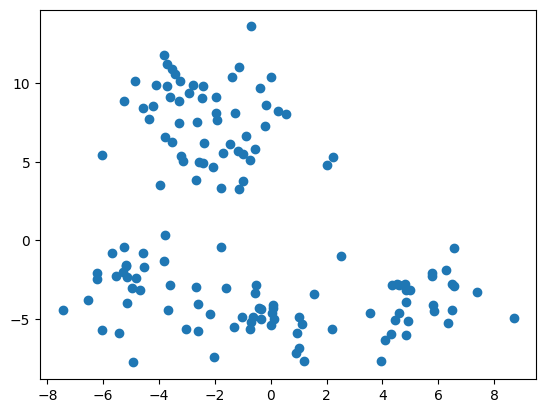

In [162]:
plt.scatter(penguins[0][:,0],penguins[0][:,-1])

In [163]:
clusters =kmeans.cluster_centers_ #viewing the clusters
print(clusters)


[[-4.93329206 -2.69401949]
 [-1.8007261   5.20994096]
 [ 5.29441559 -3.82617619]
 [-2.57601693  9.4548129 ]
 [-0.36071604 -5.07907444]]


In [164]:
y_km = kmeans.fit_predict(pengs)

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


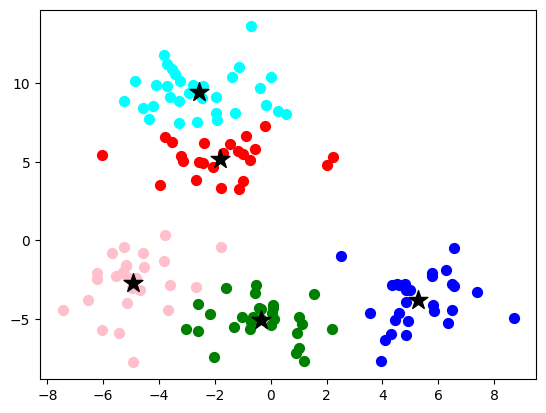

In [165]:


plt.scatter(pengs[y_km == 0,0],pengs[y_km == 0,1],s= 50, color = "red")
plt.scatter(pengs[y_km == 1,0],pengs[y_km == 1,1],s= 50, color = "blue")
plt.scatter(pengs[y_km == 2,0],pengs[y_km == 2,1],s= 50, color = "green")
plt.scatter(pengs[y_km == 3,0],pengs[y_km == 3,1],s= 50, color = "pink")
plt.scatter(pengs[y_km == 4,0],pengs[y_km == 4,1],s= 50, color = "cyan")

plt.scatter(clusters[0][0],clusters[0][1],marker = "*", s= 200, color = "black")
plt.scatter(clusters[1][0],clusters[1][1],marker = "*", s= 200, color = "black")
plt.scatter(clusters[2][0],clusters[2][1],marker = "*", s= 200, color = "black")
plt.scatter(clusters[3][0],clusters[3][1],marker = "*", s= 200, color = "black")
plt.scatter(clusters[4][0],clusters[4][1],marker = "*", s= 200, color = "black")

In [167]:
wcss = []

In [168]:
for i in range(1, 11):
    # Create an instance of KMeans
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [169]:
kmeans.fit(pengs)

KMeans(n_clusters=10, n_init=10, random_state=0)

In [170]:
wcss.append(kmeans.inertia_)

In [171]:
wcss = np.array(wcss)


ValueError: x and y must have same first dimension, but have shapes (1,) and (10,)

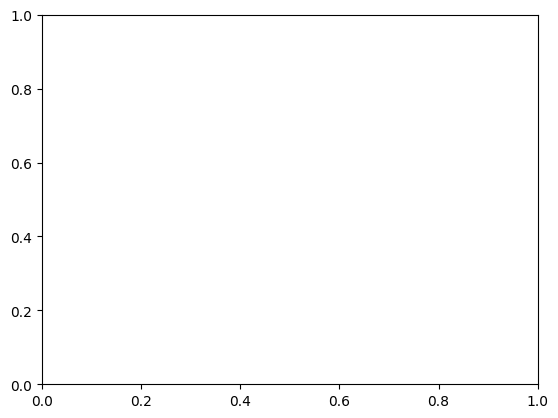

In [172]:

# Plot the WCSS values against the number of clusters
plt.plot(wcss,range(1, 11))
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
